In [24]:
import pandas as pd 
import glob
from datetime import date, timedelta
from wetterdienst import Wetterdienst

import geopandas as gpd

import requests
import json
import numpy as np

In [67]:
dfgeo = gpd.read_file('https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.geojson')

In [69]:
dfgeo = dfgeo.loc[dfgeo['Landkreis'] == 'SK Nürnberg']

In [71]:
dfgeo = dfgeo.groupby(['Refdatum']).sum()

In [74]:
dfgeo = dfgeo.reset_index()


In [76]:
df1 = pd.DataFrame(dfgeo)

In [90]:
df1['Summe7Tage'] = df1.AnzahlFall.rolling(min_periods=1, window=7).sum()

In [97]:
df1['7TIW'] = (df1.Summe7Tage/518000)*100000

<AxesSubplot:xlabel='Refdatum'>

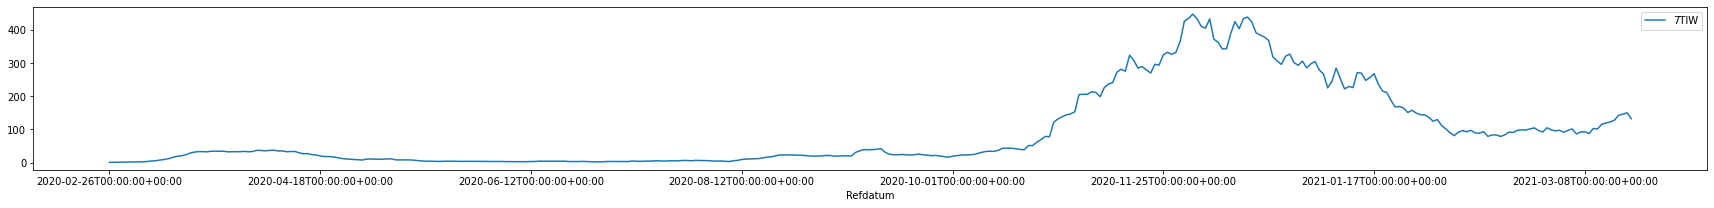

In [100]:
df1.plot(x='Refdatum',y='7TIW',figsize=(30,3))

In [103]:
df1 = df1[['Refdatum','7TIW']]

In [104]:
df1

,Refdatum,7TIW
0,2020-02-26T00:00:00+00:00,0.385829
1,2020-02-27T00:00:00+00:00,0.771657
2,2020-02-29T00:00:00+00:00,0.964571
3,2020-03-01T00:00:00+00:00,1.157486
4,2020-03-02T00:00:00+00:00,1.543314
...,...,...
357,2021-03-15T00:00:00+00:00,127.709240
358,2021-03-16T00:00:00+00:00,142.370723
359,2021-03-17T00:00:00+00:00,145.843180
360,2021-03-18T00:00:00+00:00,149.894379


In [19]:
df1.columns = ['7TIW']

NameError: name 'df1' is not defined

# Wetterdaten holen

In [25]:
today = date.today()
print("Today's date:", today)

Today's date: 2021-03-31


In [26]:
API = Wetterdienst("dwd", "observation")

request = API(
    parameter=["climate_summary"],
    resolution="daily",
    start_date="2020-04-02",  # Timezone: UTC
    end_date=today,  # Timezone: UTC
    tidy_data=True,  # default
    humanize_parameters=True,  # default
 ).filter(station_id=[3668]) #Wetter für Nbg

start_date and end_date filtering limited to defined periods [<Period.HISTORICAL: 'historical'>, <Period.RECENT: 'recent'>, <Period.NOW: 'now'>]
The combination of kl, daily, now is invalid.


In [27]:
stations = request.df

In [28]:
values = request.values.all().df

100%|██████████| 1/1 [00:01<00:00,  1.57s/it]


In [29]:
values.head()

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY
0,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,7.7,10
1,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,8.2,10
2,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,7.2,10
3,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,13.0,10
4,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,WIND_GUST_MAX,5.7,10


In [111]:
values.PARAMETER.value_counts()

WIND_SPEED                 353
WIND_GUST_MAX              353
CLOUD_COVER_TOTAL          353
PRESSURE_AIR               353
PRECIPITATION_HEIGHT       353
PRECIPITATION_FORM         353
SUNSHINE_DURATION          353
SNOW_DEPTH                 353
TEMPERATURE_AIR_MIN_005    353
TEMPERATURE_AIR_200        353
TEMPERATURE_AIR_MIN_200    353
TEMPERATURE_AIR_MAX_200    353
HUMIDITY                   353
PRESSURE_VAPOR             353
Name: PARAMETER, dtype: int64

In [30]:
temp = values.loc[values['PARAMETER'] == 'TEMPERATURE_AIR_200']

In [31]:
temp

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY
3276,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,4.7,3
3277,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,5.7,3
3278,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,8.0,3
3279,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,10.9,3
3280,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,10.9,3
...,...,...,...,...,...,...
3635,2021-03-27 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,7.9,1
3636,2021-03-28 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,8.3,1
3637,2021-03-29 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,10.5,1
3638,2021-03-30 00:00:00+00:00,03668,CLIMATE_SUMMARY,TEMPERATURE_AIR_200,11.8,1


<AxesSubplot:xlabel='DATE'>

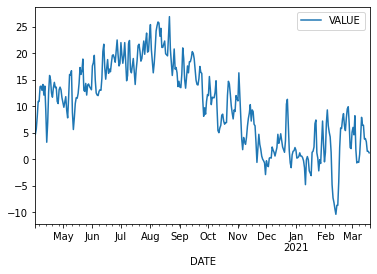

In [12]:
temp.plot(x='DATE',y='VALUE')

In [16]:
sun = values.loc[values['PARAMETER'] == 'SUNSHINE_DURATION']

In [17]:
sun

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY
1412,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.433,3
1413,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,2.067,3
1414,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.050,3
1415,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.667,3
1416,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.700,3
...,...,...,...,...,...,...
1760,2021-03-16 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,1.750,1
1761,2021-03-17 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,1.700,1
1762,2021-03-18 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,3.783,1
1763,2021-03-19 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,3.217,1


<AxesSubplot:xlabel='DATE'>

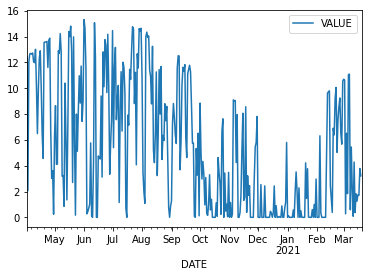

In [18]:
sun.plot(x='DATE',y='VALUE')

In [118]:
values['temp'] = temp.VALUE

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
values

,DATE,STATION_ID,PARAMETER_SET,PARAMETER,VALUE,QUALITY,temp
1412,2020-04-02 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.433,3,NaN
1413,2020-04-03 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,2.067,3,NaN
1414,2020-04-04 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.050,3,NaN
1415,2020-04-05 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.667,3,NaN
1416,2020-04-06 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,12.700,3,NaN
...,...,...,...,...,...,...,...
1760,2021-03-16 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,1.750,1,NaN
1761,2021-03-17 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,1.700,1,NaN
1762,2021-03-18 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,3.783,1,NaN
1763,2021-03-19 00:00:00+00:00,03668,CLIMATE_SUMMARY,SUNSHINE_DURATION,3.217,1,NaN


# Kalenderdaten holen

In [26]:
holidaysdf2020datum = pd.read_json('https://feiertage-api.de/api/?jahr=2020&nur_daten',orient='index')
holidaysdf2021datum = pd.read_json('https://feiertage-api.de/api/?jahr=2021&nur_daten',orient='index')

In [27]:
holidaysdf2020datum.columns = ['RefDay']
holidaysdf2021datum.columns = ['RefDay']

In [28]:
holydaysComp = pd.concat([holidaysdf2020datum,holidaysdf2021datum]).fillna(0)

In [25]:
holydaysComp.to_csv('holydays.csv')

# Corona Restriktionen holen

In [20]:
dfCoronaRestr = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
dfCoronaRestr = dfCoronaRestr[dfCoronaRestr.CountryName == 'Germany']
stringency = dfCoronaRestr[['Date','StringencyIndexForDisplay']]

In [25]:
stringency

,Date,StringencyIndexForDisplay
37380,20200101,0.00
37381,20200102,0.00
37382,20200103,0.00
37383,20200104,0.00
37384,20200105,0.00
...,...,...
37820,20210316,77.78
37821,20210317,77.78
37822,20210318,77.78
37823,20210319,77.78


In [24]:
stringency.set_index('Date')

,StringencyIndexForDisplay
Date,
20200101,0.00
20200102,0.00
20200103,0.00
20200104,0.00
20200105,0.00
...,...
20210316,77.78
20210317,77.78
20210318,77.78


# Mobilitätsbericht Google

In [37]:
import requests
import pandas as pd
from zipfile import ZipFile
from io import BytesIO

r = requests.get("https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip")
files = ZipFile(BytesIO(r.content))
df_mobile2020 = pd.read_csv(files.open("2020_DE_Region_Mobility_Report.csv"))
df_mobile2021 = pd.read_csv(files.open("2021_DE_Region_Mobility_Report.csv"))


In [38]:
df_mobile2020 = df_mobile2020[df_mobile2020.sub_region_1 == 'Bavaria']
df_mobile2021 = df_mobile2021[df_mobile2021.sub_region_1 == 'Bavaria']

In [40]:
df_mobile = df_mobile2020.append(df_mobile2021)

In [41]:
df_mobile.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
256,DE,Germany,Bavaria,NaN,NaN,DE-BY,NaN,ChIJqVPfD0wEn0cRYHk4CaQlHQE,2021-03-24,-31,1.0,67.0,-32.0,-24,9
257,DE,Germany,Bavaria,NaN,NaN,DE-BY,NaN,ChIJqVPfD0wEn0cRYHk4CaQlHQE,2021-03-25,-33,2.0,45.0,-34.0,-24,10
258,DE,Germany,Bavaria,NaN,NaN,DE-BY,NaN,ChIJqVPfD0wEn0cRYHk4CaQlHQE,2021-03-26,-35,3.0,55.0,-33.0,-24,10
259,DE,Germany,Bavaria,NaN,NaN,DE-BY,NaN,ChIJqVPfD0wEn0cRYHk4CaQlHQE,2021-03-27,-46,-2.0,-10.0,-43.0,-7,8
260,DE,Germany,Bavaria,NaN,NaN,DE-BY,NaN,ChIJqVPfD0wEn0cRYHk4CaQlHQE,2021-03-28,-39,8.0,94.0,-32.0,-2,4


<AxesSubplot:xlabel='date'>

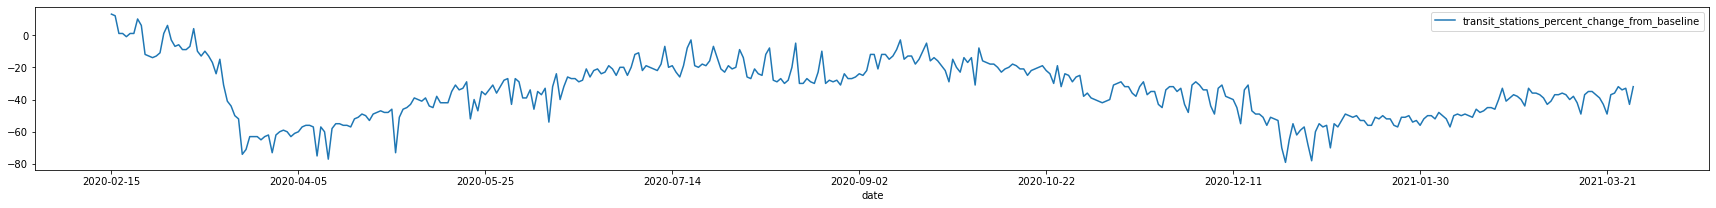

In [47]:
df_mobile.plot(x='date',y='transit_stations_percent_change_from_baseline',figsize=(30,3))

<AxesSubplot:xlabel='date'>

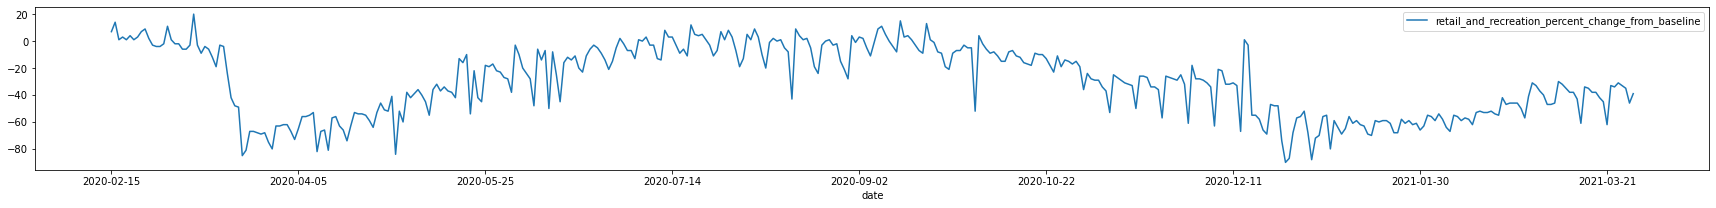

In [44]:
df_mobile.plot(x='date',y='retail_and_recreation_percent_change_from_baseline',figsize=(30,3))

<AxesSubplot:xlabel='date'>

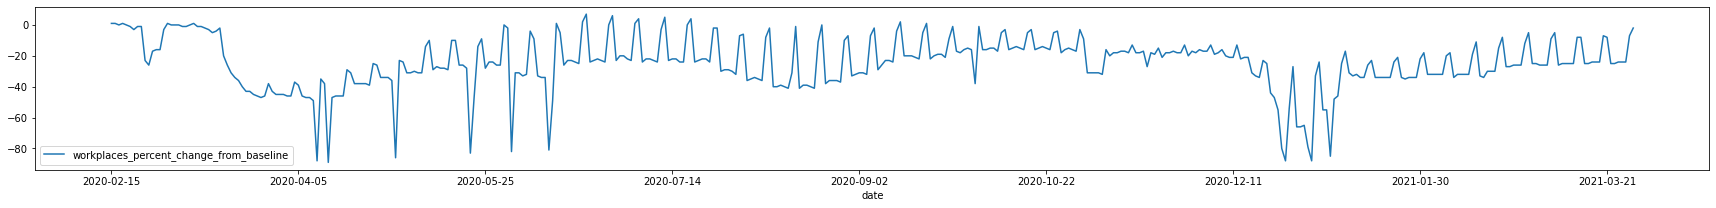

In [48]:
df_mobile.plot(x='date',y='workplaces_percent_change_from_baseline',figsize=(30,3))

<AxesSubplot:xlabel='date'>

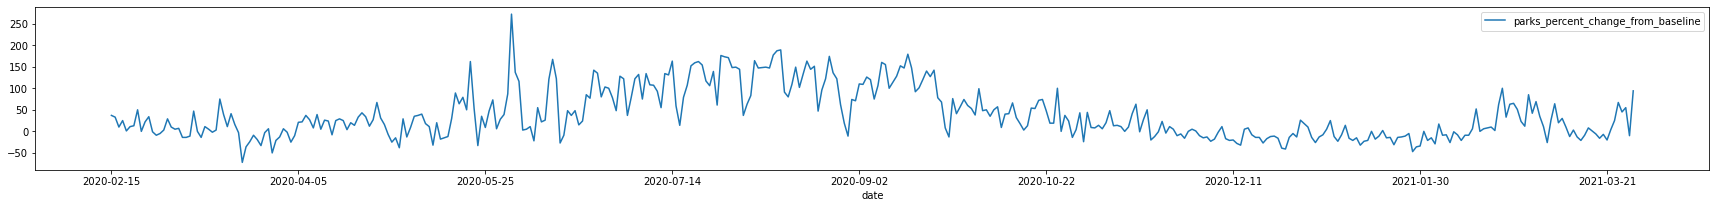

In [46]:
df_mobile.plot(x='date',y='parks_percent_change_from_baseline',figsize=(30,3))

<AxesSubplot:xlabel='date'>

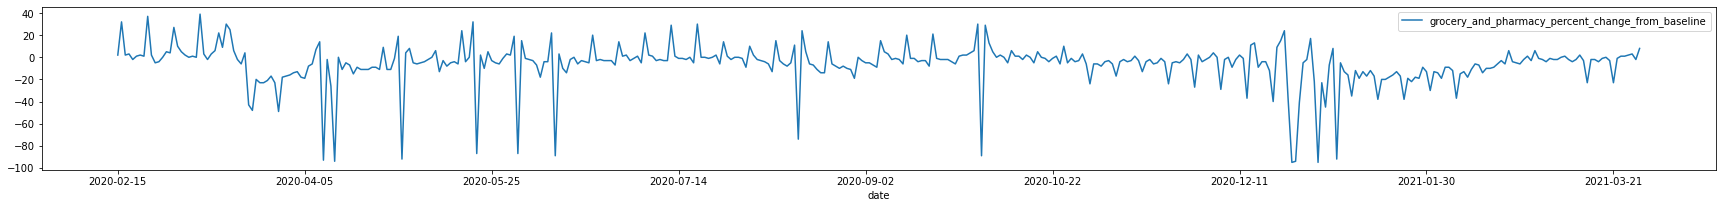

In [45]:
df_mobile.plot(x='date',y='grocery_and_pharmacy_percent_change_from_baseline',figsize=(30,3))

# Wetter Vorhersage

In [ ]:
today = date.today()
yesterday = today - timedelta(days = 1)
print("Today's date:", today)

In [1]:
from wetterdienst import Wetterdienst, Resolution, Period

from wetterdienst.dwd.forecasts import DwdMosmixType

API = Wetterdienst(provider="dwd", kind="forecast")

stations = API(mosmix_type=DwdMosmixType.SMALL).filter(station_id="10763") #Station ID ist anders als bei den Historischendaten... völlig klar
 

In [4]:
df = stations.values.all().df

  0%|          | 0/1 [00:00<?, ?it/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   0%|          | 0.00/36.1M [00:00<?, ?iB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   2%|▏         | 720k/36.1M [00:00<00:05, 7.09MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   4%|▍         | 1.42M/36.1M [00:00<00:04, 7.30MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   6%|▌         | 2.14M/36.1M [00:00<00:04, 7.37MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:   8%|▊         | 2.86M/36.1M [00:00<00:04, 7.32MiB/s]
https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_S/all_stations/kml/MOSMIX_S_LATEST_240.kmz:  10%|▉         | 3.59M/36.1M [00:00<00:04, 7.43MiB/s]
https://opendata.dwd.de/weathe

In [16]:
df_test = df

In [17]:
df_test.head()

,STATION_ID,DATE,PARAMETER,VALUE,QUALITY
0,10763,2021-03-31 00:00:00+00:00,PRESSURE_AIR_SURFACE_REDUCED,102920.0,NaN
1,10763,2021-03-31 01:00:00+00:00,PRESSURE_AIR_SURFACE_REDUCED,102890.0,NaN
2,10763,2021-03-31 02:00:00+00:00,PRESSURE_AIR_SURFACE_REDUCED,102870.0,NaN
3,10763,2021-03-31 03:00:00+00:00,PRESSURE_AIR_SURFACE_REDUCED,102840.0,NaN
4,10763,2021-03-31 04:00:00+00:00,PRESSURE_AIR_SURFACE_REDUCED,102820.0,NaN


In [12]:
df_test.value_counts('DATE')

DATE
2021-03-31 00:00:00+00:00    40
2021-03-31 01:00:00+00:00    40
2021-04-06 08:00:00+00:00    40
2021-04-06 09:00:00+00:00    40
2021-04-06 10:00:00+00:00    40
                             ..
2021-04-03 12:00:00+00:00    40
2021-04-03 13:00:00+00:00    40
2021-04-03 14:00:00+00:00    40
2021-04-03 15:00:00+00:00    40
2021-04-09 23:00:00+00:00    40
Length: 240, dtype: int64

In [18]:
df_test = df_test[df_test['PARAMETER']=='TEMPERATURE_AIR_200']

In [ ]:
df_test['VALUE'] = df_test['VALUE'] - 273.15

In [33]:
df_test['date'] = df_test['DATE'].dt.date

ipykernel_launcher:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [35]:
df_test = df_test.groupby('date').mean()

In [36]:
df_test

,VALUE
date,
2021-03-31,13.429167
2021-04-01,13.741667
2021-04-02,9.016667
2021-04-03,5.6
2021-04-04,7.195833
2021-04-05,7.020833
2021-04-06,5.641667
2021-04-07,5.991667
2021-04-08,6.045833
